In [1]:
"""
This script creates a figure of the components of 
the energy balance in 1D, watts/m^2 and altitude.
"""

import xarray as xr
import pandas as pd
import numpy as np
import datetime
from dateutil import tz
import netCDF4
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from my_fun.create_date import create_date
from my_fun.nan_helper import nan_helper
from my_fun.hour_to_day_mean import hour_to_day_mean


In [2]:
filename_nc  = '../../data/output/Peru_out_1_20160901-20170831.nc'
dir_graphics   = 'out'
name_fig     = 'SEB_prof_day'

ds = xr.open_dataset(filename_nc)

time_nc = ds['time'].values
mask_nc = ds['MASK'].values
lat_nc  = ds['lat'].values        
lon_nc  = ds['lon'].values
dem_nc   = ds['HGT'].values
lat_n = len(lat_nc)
lon_n = len(lon_nc)


In [3]:
date_day = create_date(time_nc)
com_SEB  = np.zeros((len(time_nc),14)) 
point_g = np.sum(mask_nc[mask_nc==1])
elev_g  = np.zeros((int(point_g),1))

z = 0
for i in range(lat_n):
    for j in range(lon_n):
            if mask_nc[i,j] == 1:
                var1 = dem_nc[i,j]
                elev_g[z,0] = var1
                z = z+1

elev_g_20 = np.arange(np.min(elev_g),np.max(elev_g),10) 

var_t   = np.zeros((int((len(time_nc)+1)/24),1))
t1      = 0
for i in range(len(var_t)):
    time_nc1 = time_nc[t1]
    t1       = t1+24
    x = pd.to_datetime(time_nc1)
    x1 = time.mktime(x.timetuple())
    var_t[i,0] = x1

var1 = np.zeros((len(elev_g_20),len(var_t)))

days_num = int(len(time_nc)/24)

var1a    = ds['G'].values
var1_d   = hour_to_day_mean(days_num,var1a)

var1a    = ds['ALBEDO'].values
var2_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var1 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_day1 = var2_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]*(1-var_nc_day1[i,j])
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var1[:,t] = var_01
var1 = np.mean(var1,axis=1)

var1a    = ds['LWin'].values
var1_d   = hour_to_day_mean(days_num,var1a)

var1a    = ds['LWout'].values
var2_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape


var2 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_day1 = var2_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j] + var_nc_day1[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var2[:,t] = var_01
var2 = np.mean(var2,axis=1)

var1a    = ds['H'].values
var1_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape


var3 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var3[:,t] = var_01
var3 = np.mean(var3,axis=1)

var1a    = ds['LE'].values
var1_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var4 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var4[:,t] = var_01
var4 = np.mean(var4,axis=1)

var1a    = ds['B'].values
var1_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var5 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var5[:,t] = var_01

var5 = np.mean(var5,axis=1)

var1a    = ds['ME'].values
var1_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var6 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var6[:,t] = var_01

var6 = np.mean(var6,axis=1)


/home/christian/Documents/pro_chris/cosipy_peru/postprocessing/post_cosipy/my_fun/hour_to_day_mean.py:16: RuntimeWarning: Mean of empty slice
  ME_day[t,:,:] = np.nanmean(var_nc,axis=0)
<ipython-input-3-77b440bb01c0>:61: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-3-77b440bb01c0>:106: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-3-77b440bb01c0>:147: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-3-77b440bb01c0>:187: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-3-77b440bb01c0>:227: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-3-77b440bb01c0>:268: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)


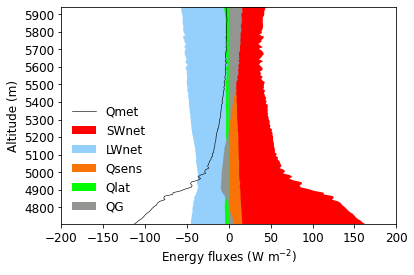

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
ax.fill_betweenx(elev_g_20, var1, facecolor=('r'),label='SWnet')
ax.fill_betweenx(elev_g_20, var2,facecolor=('#95d0fc'),label='LWnet')
ax.fill_betweenx(elev_g_20, var3,facecolor=('#f97306'),label='Qsens')
ax.fill_betweenx(elev_g_20, var4,facecolor=([0,1,0]),label='Qlat')
ax.fill_betweenx(elev_g_20, var5,facecolor=('#929591'),label='QG')
ax.plot(var6*-1,elev_g_20,'k',lw=0.6, label='Qmet')
ax.set_yticks(np.arange(4800, 6600, 100.0))
ax.set_ylabel('Altitude (m)')
ax.set_xlabel('Energy fluxes (W m$^{-2}$)')
ax.set_xlim(-200, 200)
ax.set_ylim(np.min(elev_g_20),np.max(elev_g_20))
ax.legend(loc='lower left',ncol=1, frameon=False)
font_f = 12
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize

fig.savefig(dir_graphics+'/'+name_fig+'.pdf',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1, format='pdf')